In [1]:
import netCDF4 as nc
import numpy as np

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/pytho

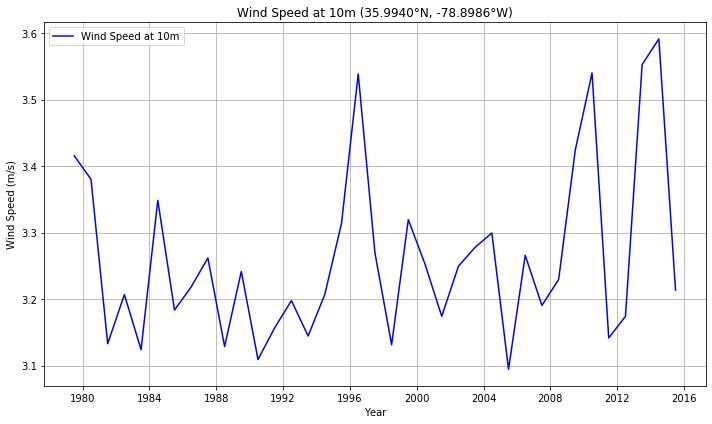

In [5]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Load the NetCDF file
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)

# Retrieve latitude and longitude arrays
lats = fp['lat'][:]
lons = fp['lon'][:]

# Find the nearest indices for the given latitude and longitude
lat = 35
lon = -76.00
ilat = np.argmin(np.abs(lats - lat))
ilon = np.argmin(np.abs(lons - lon))

# Extract the required variable and time
output_era = {}
vars = ['wspd10']

for var in vars:
    if var == 'wspd10':
        # Extract wind speed at the closest lat/lon point
        output_era['wspd10'] = fp['wspd10'][:, ilat, ilon]  # Time series at selected point
    # Extract and convert time
    times = fp['time']
    output_era['dates'] = nc.num2date(times[:], units=times.units, calendar=times.calendar)

# Close the NetCDF file
fp.close()

# Plot the wind speed data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(output_era['dates'], output_era['wspd10'], label='Wind Speed at 10m', color='b')

# Customize the plot
plt.title("Wind Speed at 10m (35.9940°N, -78.8986°W)")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
